In [3]:
import networkx as nx
import matplotlib.pyplot as plt

In [4]:
reddit_graph = nx.DiGraph()

In [5]:
with open("reddits.txt") as f:
    line = f.readline()
    while line:
        u,v = line.strip().split(" ")
        reddit_graph.add_edge(u,v)
        line = f.readline()

In [6]:
list(reddit_graph.nodes())[:10]

['teamredditteams',
 'loltwistedtreeline',
 'houseparty5v5',
 'inlandempire',
 'california',
 'playmygame',
 'indiegames',
 'webgames',
 'megamuseum',
 'locationbot']

In [7]:
len(reddit_graph.nodes())

12496

In [8]:
len(reddit_graph.edges())

16471

In [9]:
comps = list(nx.strongly_connected_components(reddit_graph))

In [54]:
sorted_comps = sorted(comps, key=len)
print(sorted_comps[-1:])

[{'nyyankees', 'annarbor', 'hawks', 'orlandomagic', 'reds', 'buccaneers', 'sabres', 'coloradoavalanche', 'grandrapids', 'kings', 'stillbullstome', 'whitesox', 'braves', 'devils', 'rangers', 'kzoo', 'fantasybaseball', 'detroitredwings', 'motorcitykitties', 'ottawasenators', 'coloradorockies', 'clevelandcavs', 'uticacomets', 'edmontonoilers', 'bostonbruins', 'mlb', 'colts', 'penguins', 'bracketchallenge', 'ffcommish', 'timberwolves', 'heat', 'jaguars', 'thunder', 'cyclingmsp', 'rockets', 'atlantahawks', 'nhl', 'calgaryflames', 'mariners', 'minneapolis', 'collegebaseball', 'hockeygamegifs', 'findaleague', 'habs', 'dynastyfootballleague', 'michigan', 'canucks', 'minnesota', 'laclippers', 'hockeyjerseys', 'kcroyals', 'wahoostipi', 'torontobluejays', 'orioles', 'dallasstars', 'mlbdraft', 'utahjazz', 'lakers', 'detroitpistons', 'dfsports', 'charlottehornets', 'astros', 'theb1g', 'kansascity', 'buccos', 'warriors', 'nfl_draft', 'cardinals', 'dynastyff', 'newyorkislanders', 'stlouisblues', 'pac

In [76]:
import re

In [ ]:
def findSubredditComponent(subreddit, sorted_comps):
    for comp in reversed(sorted_comps):
        print(comp)
        for sub in comp:
            if subreddit in sub:
                return comp
    return None

In [80]:
doge_comp = findSubredditComponent('doge', sorted_comps)
print(doge_comp)

{'litecoinmining', 'dogetipbot', 'bamt', 'dogeducation', 'dogecoinbeg', 'gawminers', 'scryptmining', 'cryptocove', 'dogecoindefenseforce', 'dogemining'}


In [81]:
trump_comp = findSubredditComponent('anime', sorted_comps)
sorted_comps.append(trump_comp)

TypeError: 'NoneType' object is not iterable

In [72]:
sorted_comps.append(doge_comp)

In [73]:
biggest = {item:i for i,sublist in enumerate(sorted_comps[-3:]) for item in sublist}

TypeError: 'NoneType' object is not iterable

In [ ]:
print(biggest)

{'donaldtrump': 1, 'litecoinmining': 2, 'dogetipbot': 2, 'bamt': 2, 'dogeducation': 2, 'dogecoinbeg': 2, 'gawminers': 2, 'scryptmining': 2, 'cryptocove': 2, 'dogecoindefenseforce': 2, 'dogemining': 2}


In [ ]:
sub = nx.subgraph(reddit_graph, biggest.keys())

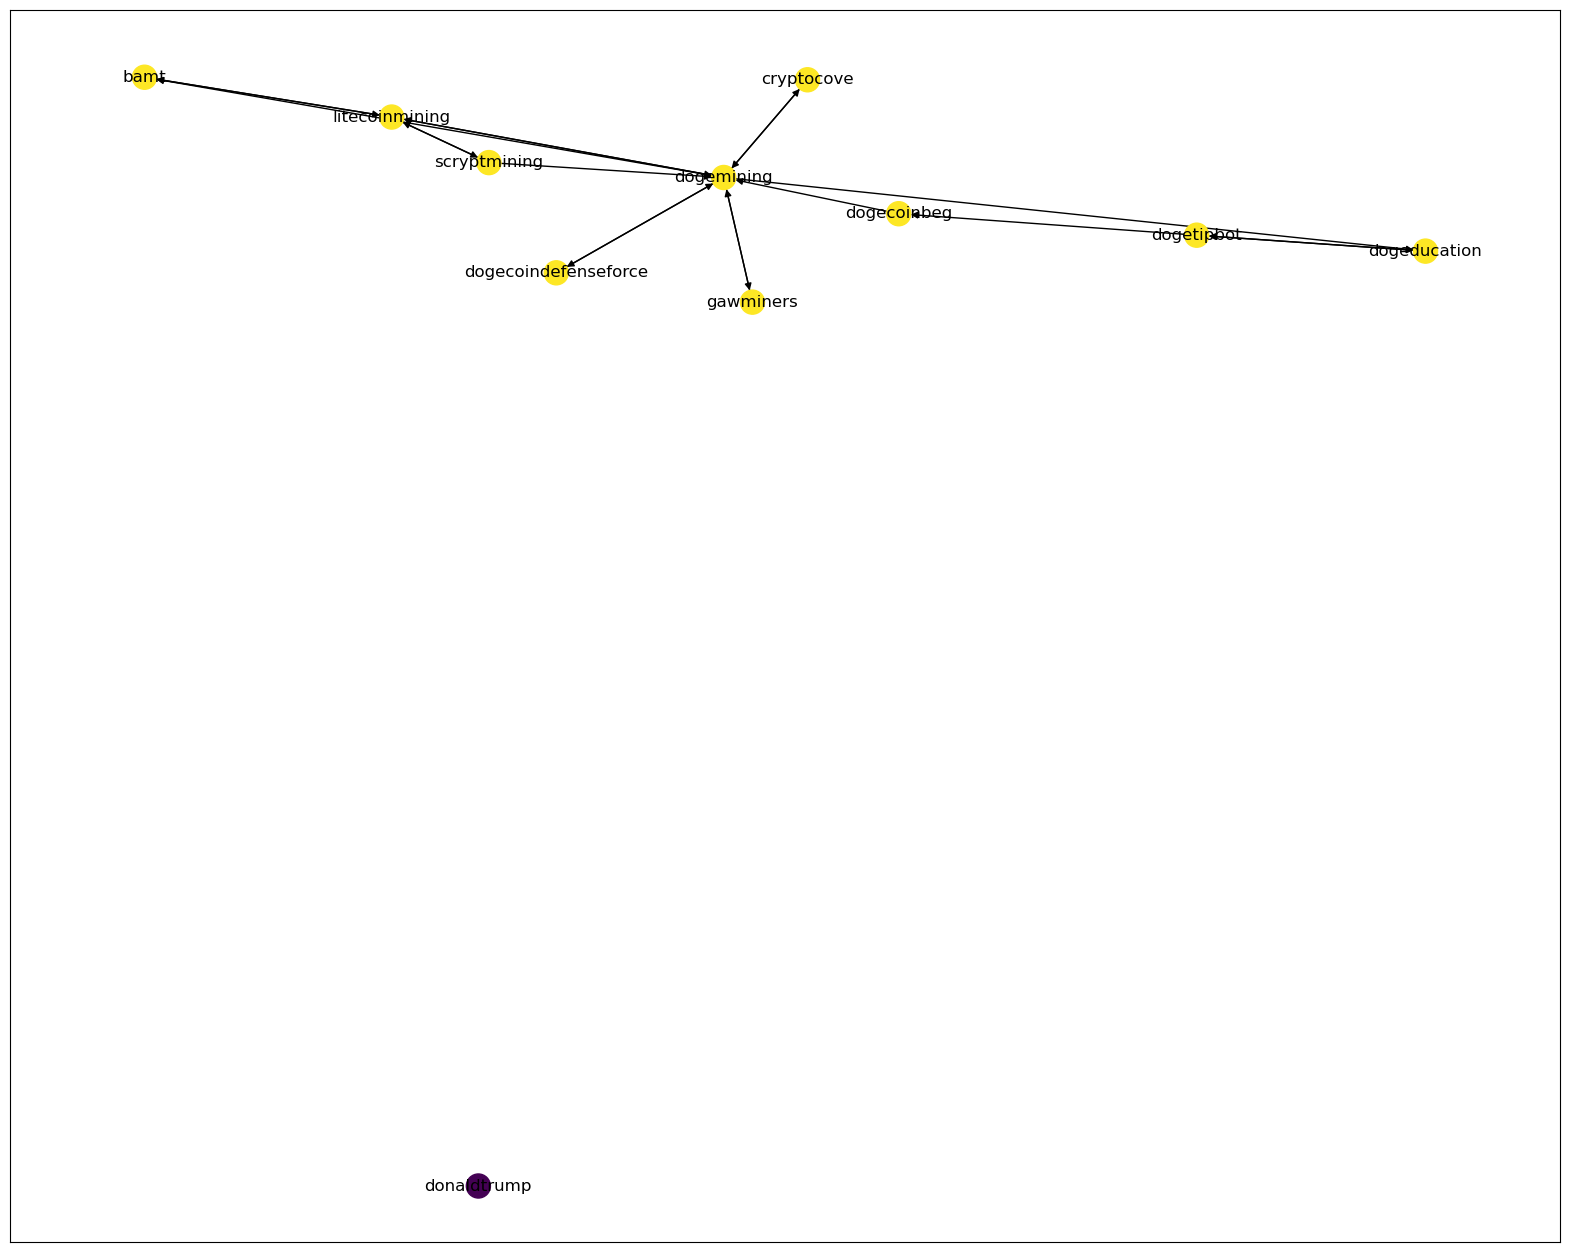

In [ ]:
fig = plt.figure(figsize=(20,16))
nx.draw_networkx(sub, node_color = [biggest[item] for item in sub.nodes()])